# Visualizing Networks: Les Miserables

This is a simple tutorial about using Networkx to visualize networks.
In this example a datataset about Les Miserables: each node is a character and and edge connect character that appears in the same chapters. The more the chapters they appears together the higher the value of the edges. 

## Reading data

Networkx supports [several graph formats](https://networkx.github.io/documentation/stable/reference/readwrite/index.html). Here we will read a gml file.

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(context='talk', style="whitegrid", rc={'figure.figsize':[10,10]})

nsize=20

G = nx.read_gml('data/lesmiserables.gml')   
print(G.edges())

[('Myriel', 'Napoleon'), ('Myriel', 'MlleBaptistine'), ('Myriel', 'MmeMagloire'), ('Myriel', 'CountessDeLo'), ('Myriel', 'Geborand'), ('Myriel', 'Champtercier'), ('Myriel', 'Cravatte'), ('Myriel', 'Count'), ('Myriel', 'OldMan'), ('Myriel', 'Valjean'), ('MlleBaptistine', 'MmeMagloire'), ('MlleBaptistine', 'Valjean'), ('MmeMagloire', 'Valjean'), ('Labarre', 'Valjean'), ('Valjean', 'Marguerite'), ('Valjean', 'MmeDeR'), ('Valjean', 'Isabeau'), ('Valjean', 'Gervais'), ('Valjean', 'Fantine'), ('Valjean', 'MmeThenardier'), ('Valjean', 'Thenardier'), ('Valjean', 'Cosette'), ('Valjean', 'Javert'), ('Valjean', 'Fauchelevent'), ('Valjean', 'Bamatabois'), ('Valjean', 'Simplice'), ('Valjean', 'Scaufflaire'), ('Valjean', 'Woman1'), ('Valjean', 'Judge'), ('Valjean', 'Champmathieu'), ('Valjean', 'Brevet'), ('Valjean', 'Chenildieu'), ('Valjean', 'Cochepaille'), ('Valjean', 'Woman2'), ('Valjean', 'MotherInnocent'), ('Valjean', 'Gavroche'), ('Valjean', 'Gillenormand'), ('Valjean', 'MlleGillenormand'), ('

In [29]:
print(G.edges(data=True)) #Now shows also attribute of edges

[('Myriel', 'Napoleon', {'value': 1}), ('Myriel', 'MlleBaptistine', {'value': 8}), ('Myriel', 'MmeMagloire', {'value': 10}), ('Myriel', 'CountessDeLo', {'value': 1}), ('Myriel', 'Geborand', {'value': 1}), ('Myriel', 'Champtercier', {'value': 1}), ('Myriel', 'Cravatte', {'value': 1}), ('Myriel', 'Count', {'value': 2}), ('Myriel', 'OldMan', {'value': 1}), ('Myriel', 'Valjean', {'value': 5}), ('MlleBaptistine', 'MmeMagloire', {'value': 6}), ('MlleBaptistine', 'Valjean', {'value': 3}), ('MmeMagloire', 'Valjean', {'value': 3}), ('Labarre', 'Valjean', {'value': 1}), ('Valjean', 'Marguerite', {'value': 1}), ('Valjean', 'MmeDeR', {'value': 1}), ('Valjean', 'Isabeau', {'value': 1}), ('Valjean', 'Gervais', {'value': 1}), ('Valjean', 'Fantine', {'value': 9}), ('Valjean', 'MmeThenardier', {'value': 7}), ('Valjean', 'Thenardier', {'value': 12}), ('Valjean', 'Cosette', {'value': 31}), ('Valjean', 'Javert', {'value': 17}), ('Valjean', 'Fauchelevent', {'value': 8}), ('Valjean', 'Bamatabois', {'value':

## Drawing graphs

Networkx provides an easy [draw()](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) function and [different algorithms to compute the layout](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout):

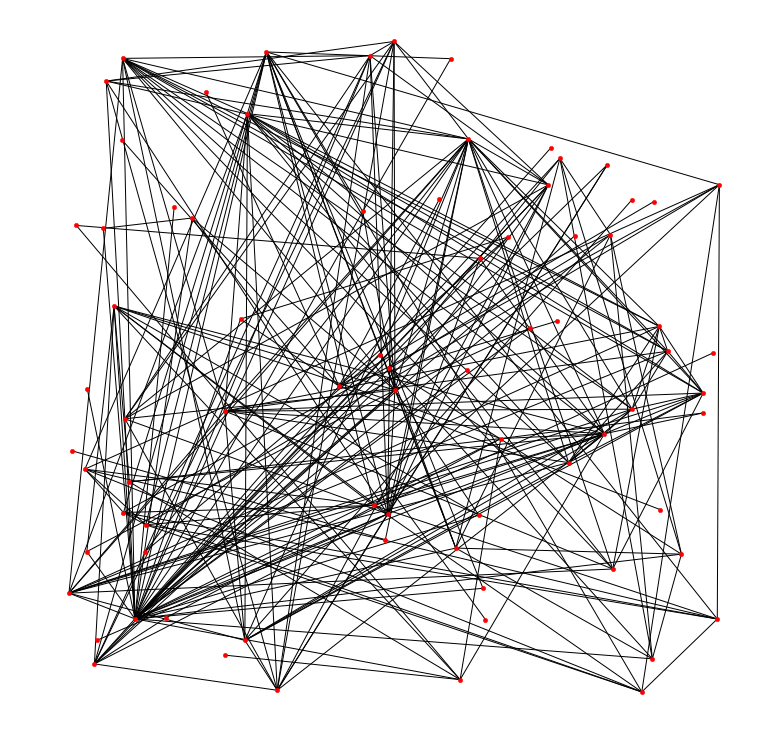

In [24]:
nx.draw(G, pos=nx.random_layout(G), node_size=nsize) #ore use draw_random

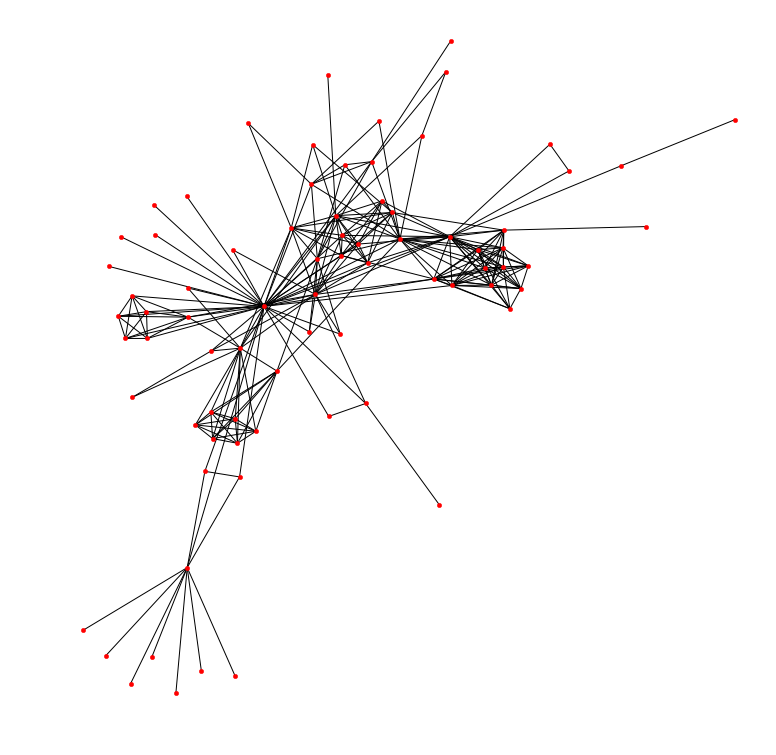

In [17]:
nx.draw(G, pos=nx.spring_layout(G), node_size=nsize) #or use draw_spring

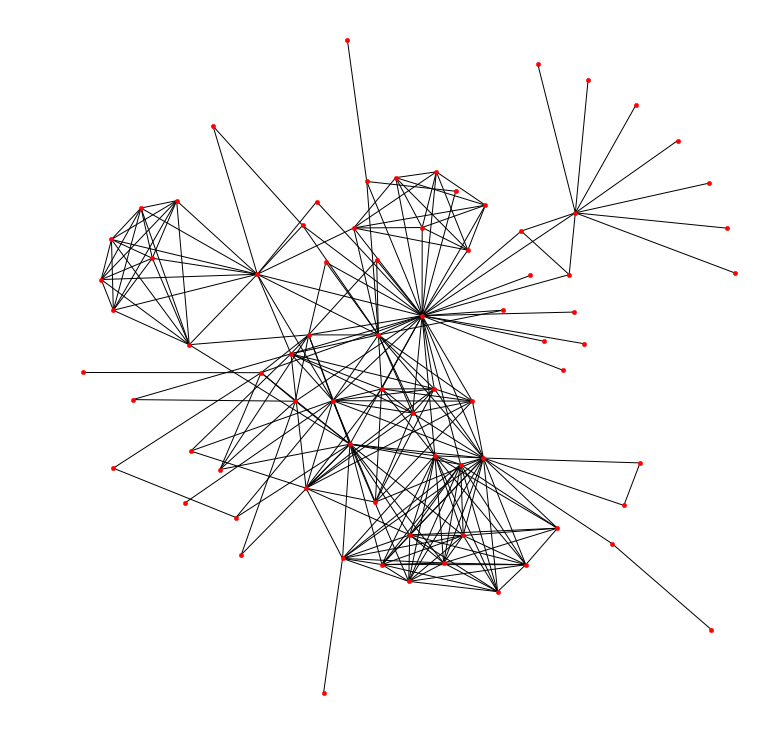

In [71]:
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=nsize) #or use draw_kamada_kawai

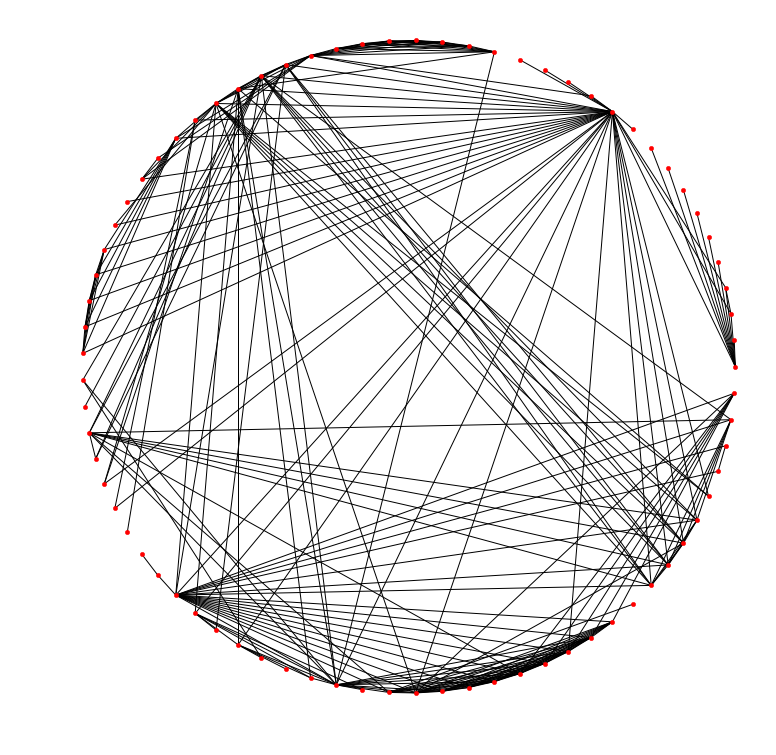

In [26]:
nx.draw(G, pos=nx.circular_layout(G), node_size=nsize) #or use draw_circular

## Labeling

It is possible to add labels using with_labels parameter, or with a specific function [draw_networkx_labels()](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html#networkx.drawing.nx_pylab.draw_networkx_labels):

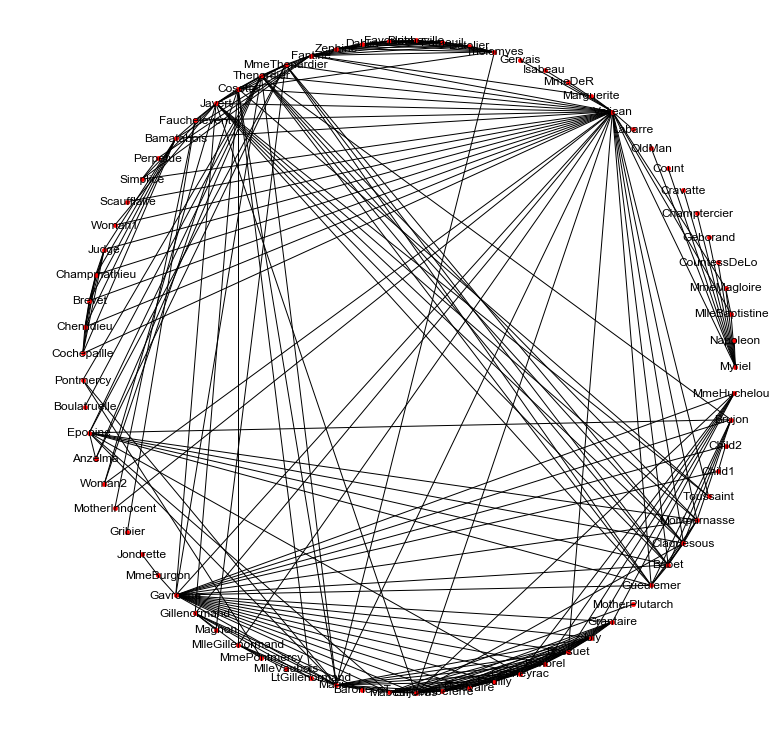

In [35]:
nx.draw(G, pos=nx.circular_layout(G), node_size=nsize, with_labels=True)

Try to improve labels position, manually changing position of labels generated by function [draw_networkx_labels()](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html#networkx.drawing.nx_pylab.draw_networkx_labels):

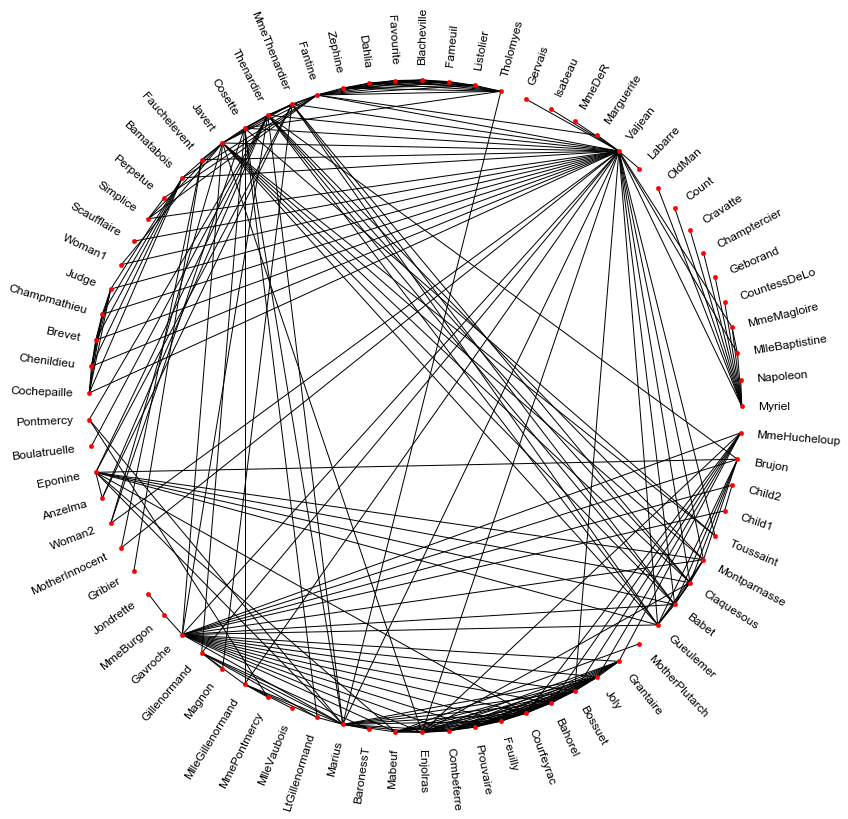

In [69]:
fig = plt.figure()
pos = nx.circular_layout(G)
nx.draw(G, pos=nx.circular_layout(G), node_size=nsize)
labels = nx.draw_networkx_labels(G,pos)

r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for n, t in labels.items():
    bb = t.get_window_extent(renderer=r)
    bbdata = bb.transformed(trans)
    radius = 1.05+bbdata.width/2   
    angle = np.arctan2(pos[n][1],pos[n][0])
    position = (radius*np.cos(angle),radius* np.sin(angle))
    t.set_position(position)
    #if (angle > np.pi/2.0):
    #    angle = angle - np.pi
    #if (angle < -np.pi/2.0):
    #    angle = angle + np.pi
    t.set_rotation(angle*360.0/(2.0*np.pi))
    t.set_clip_on(False)




## Encoding attributes

The draw() function allow to encode an attribute (e.g., edge attribute) with the size of edges:

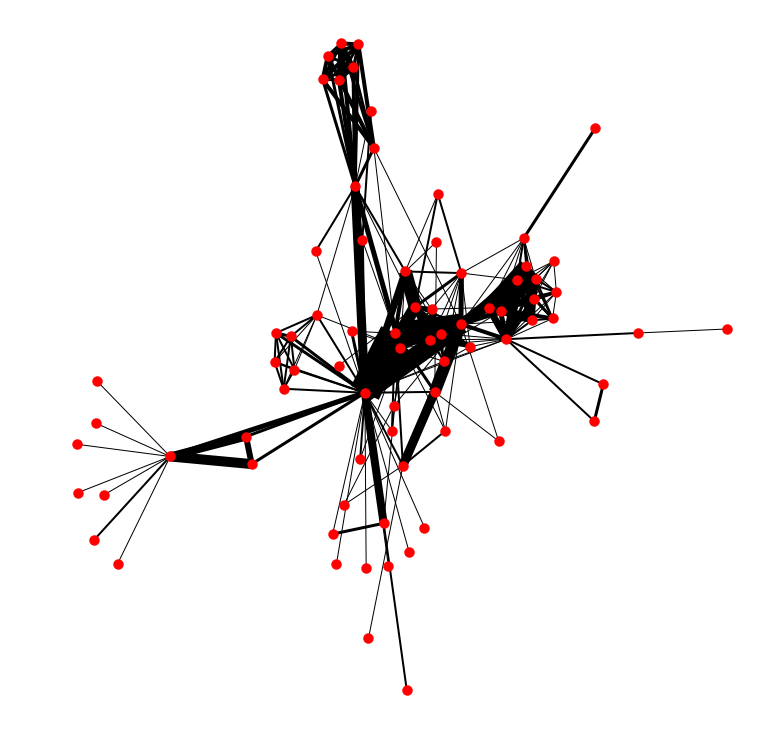

In [126]:
values = list(nx.get_edge_attributes(G,'value').values()) #create a list with the values of the network
nx.draw(G,pos=nx.spring_layout(G),width=values, node_size=100)

Or using colors:

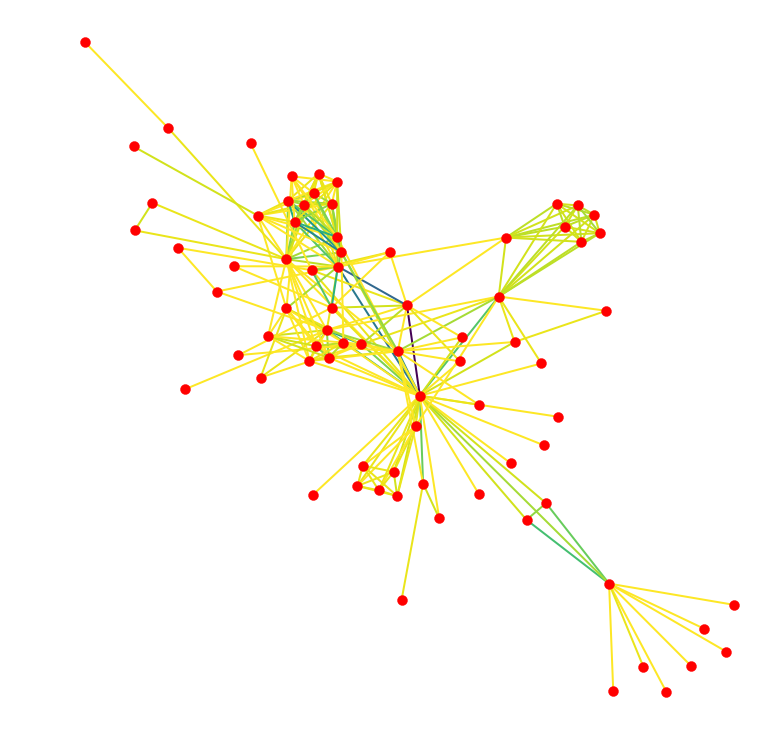

In [161]:
values = list(nx.get_edge_attributes(G,'value').values())
cmap = plt.get_cmap('viridis_r')
nx.draw(G,pos=nx.spring_layout(G),edge_color=values, edge_cmap=cmap, width=2, node_size=100)

You can also use the [draw_network_edges()](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html#networkx.drawing.nx_pylab.draw_networkx_edges) to create more layers:

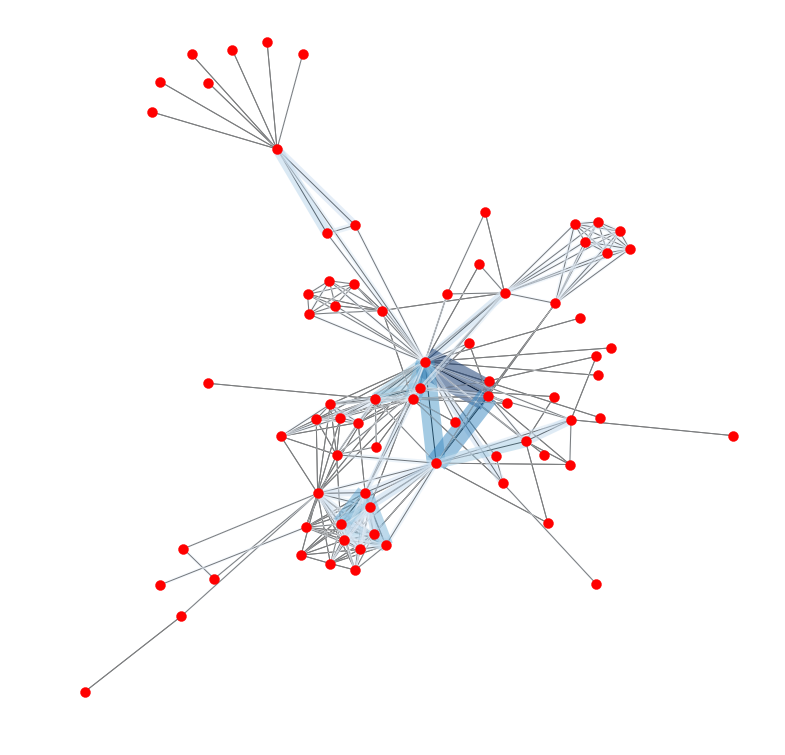

In [164]:
values = list(nx.get_edge_attributes(G,'value').values())
pos = nx.spring_layout(G)
cmap = plt.get_cmap('Blues')
nx.draw(G, pos=pos, width=1, node_size=100)
nx.draw_networkx_edges(G, pos=pos, edge_color=values, width=values, alpha=0.5, edge_cmap=cmap, node_size=100)

## Filtering 

Let's draw only edges with a value greater than fixed threshold:

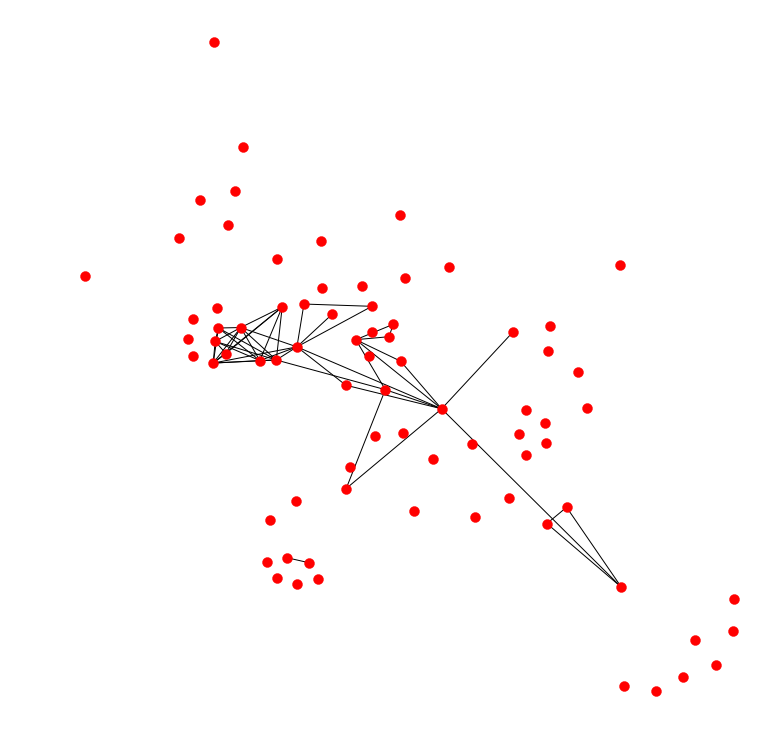

In [173]:
thrsh=5

values = nx.get_edge_attributes(G,'value') # values
sel = [g for g in G.edges() if  values[g]>=thrsh] #selection of nodes
nx.draw(G, pos=nx.spring_layout(G), node_size=100, edgelist=sel)

You probably want to remove isolated nodes, creating a new graph:

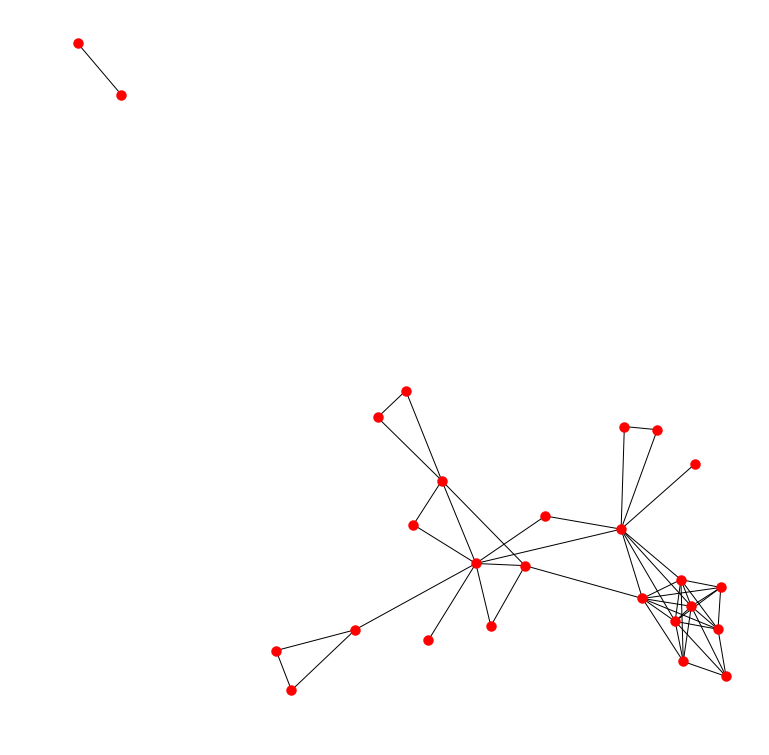

In [213]:
selG = nx.Graph(sel)
nx.draw(selG, pos=nx.spring_layout(selG), node_size=100)

An interesting thing is also filtering less important nodes, e.g., using [centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality):

In [212]:
centr = nx.betweenness_centrality(G)

values = list(centr.values())
values.sort(reverse=True)
tsh = values[30] #we keep only the 30 most central nodes

sel_nodes = [n for n,v in centr.items() if v>tsh] #selected nodes

Now using [subgraph()](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html?highlight=subgraph#networkx.Graph.subgraph) we create the subgraph desired:

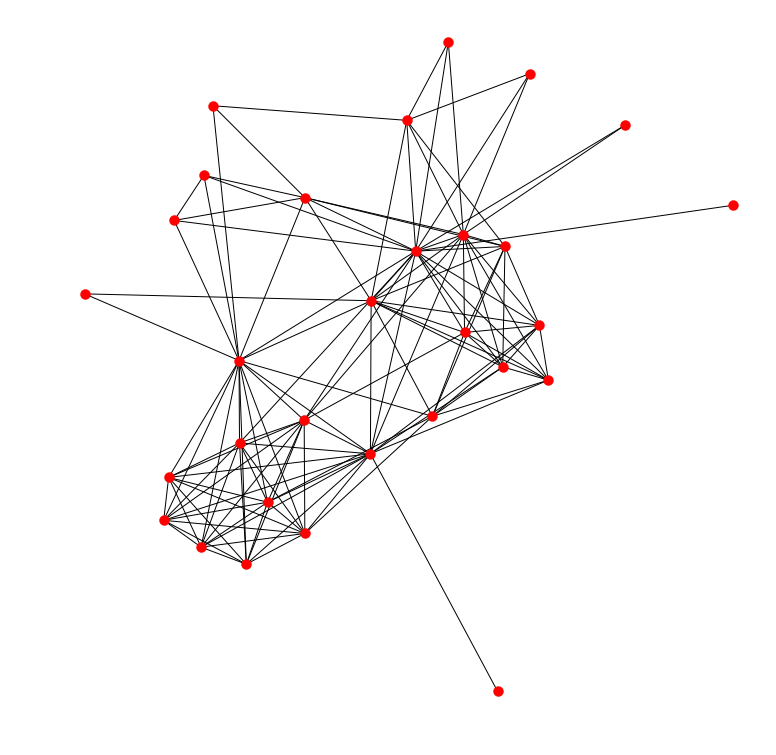

In [214]:
subG = G.subgraph(sel_nodes)
nx.draw(subG, pos=nx.spring_layout(subG), node_size=100)

## Adjacency matrix

You can create the adjacency matrix, in a convenient format, using [to_pandas_adjacency()](https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.to_pandas_adjacency.html?highlight=pandas#networkx.convert_matrix.to_pandas_adjacency):

In [239]:
matrix = nx.to_pandas_adjacency(G,weight='value')
matrix.head()

,Myriel,Napoleon,MlleBaptistine,MmeMagloire,CountessDeLo,Geborand,Champtercier,Cravatte,Count,OldMan,...,MotherPlutarch,Gueulemer,Babet,Claquesous,Montparnasse,Toussaint,Child1,Child2,Brujon,MmeHucheloup
Myriel,0.0,1.0,8.0,10.0,1.0,1.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Napoleon,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MlleBaptistine,8.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MmeMagloire,10.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CountessDeLo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


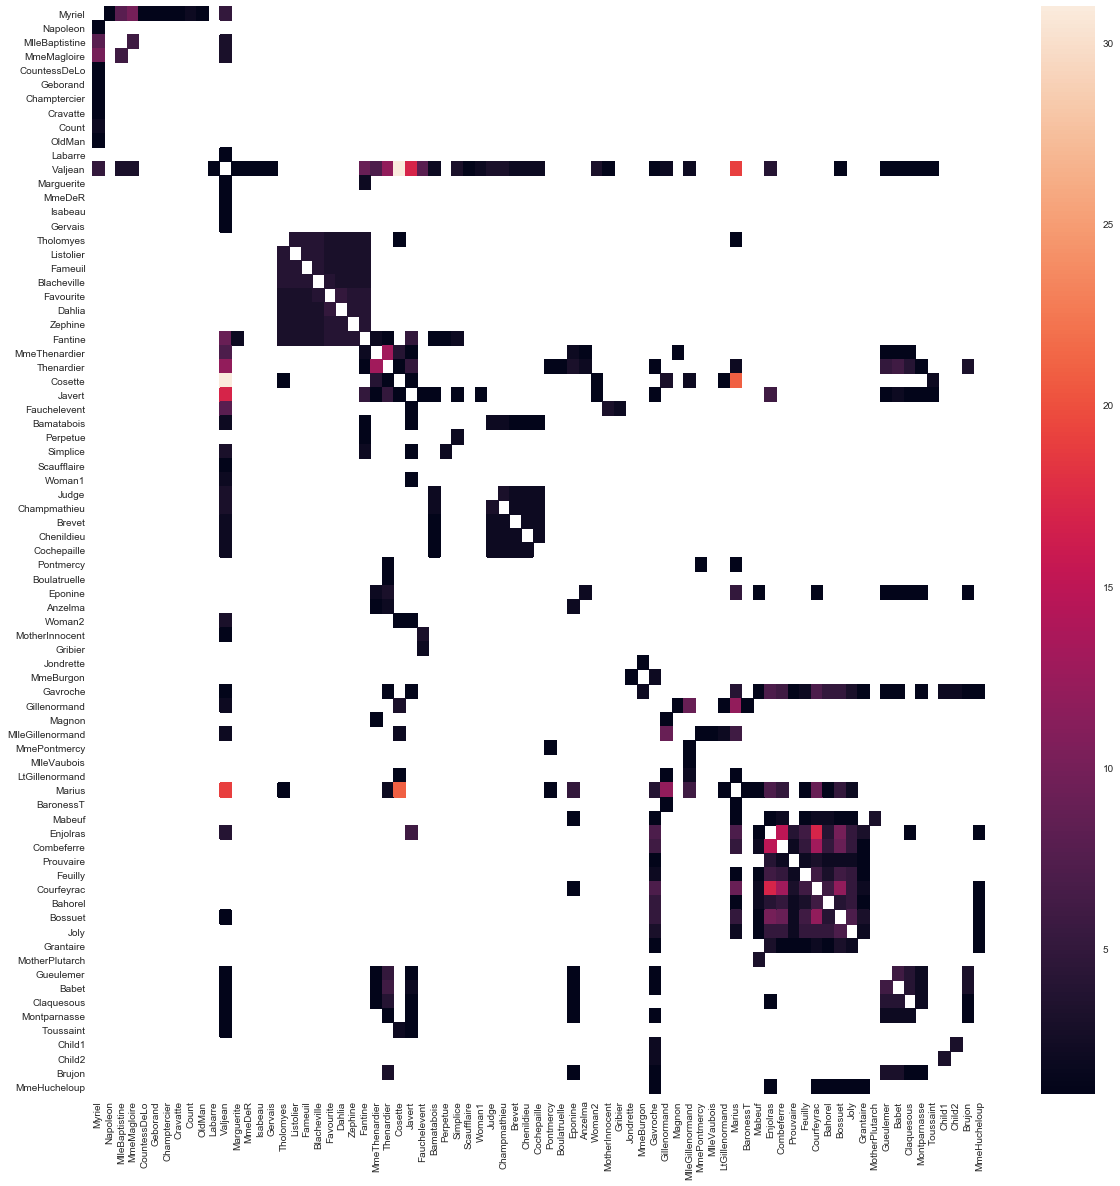

In [254]:
sns.set(rc={'figure.figsize':[20,20]},style='white')
sns.heatmap(matrix)

In [241]:
matrix = nx.to_pandas_adjacency(G,weight='value',nonedge=float('nan'))
matrix.head()

,Myriel,Napoleon,MlleBaptistine,MmeMagloire,CountessDeLo,Geborand,Champtercier,Cravatte,Count,OldMan,...,MotherPlutarch,Gueulemer,Babet,Claquesous,Montparnasse,Toussaint,Child1,Child2,Brujon,MmeHucheloup
Myriel,NaN,1.0,8.0,10.0,1.0,1.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Napoleon,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MlleBaptistine,8.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MmeMagloire,10.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountessDeLo,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


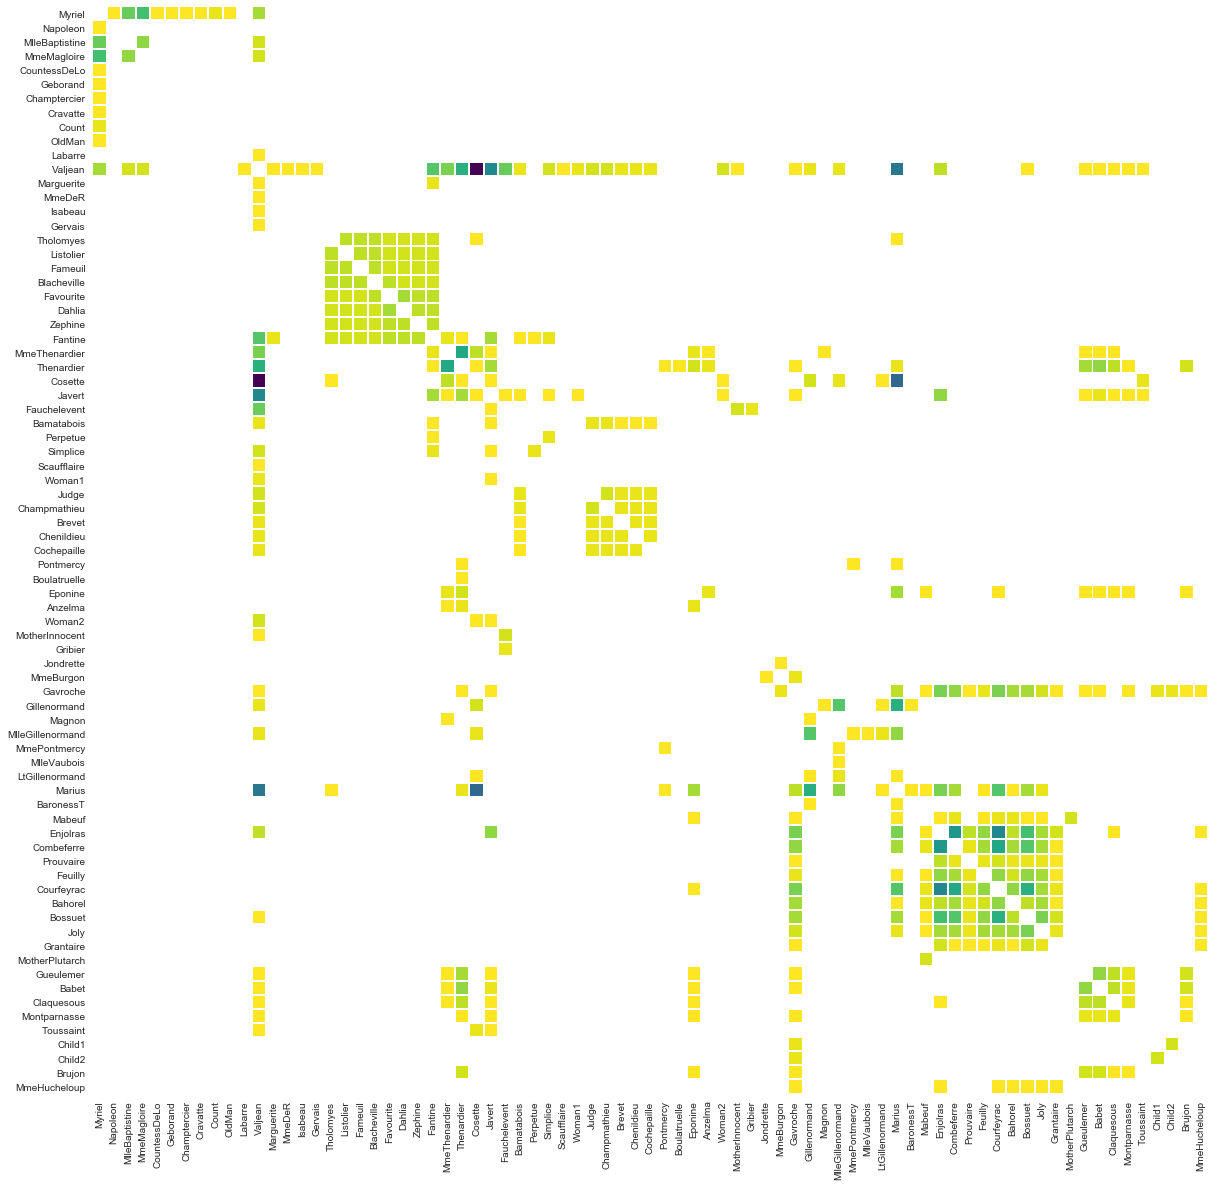

In [255]:
sns.heatmap(matrix,cbar=False,cmap='viridis_r',linewidths=1)

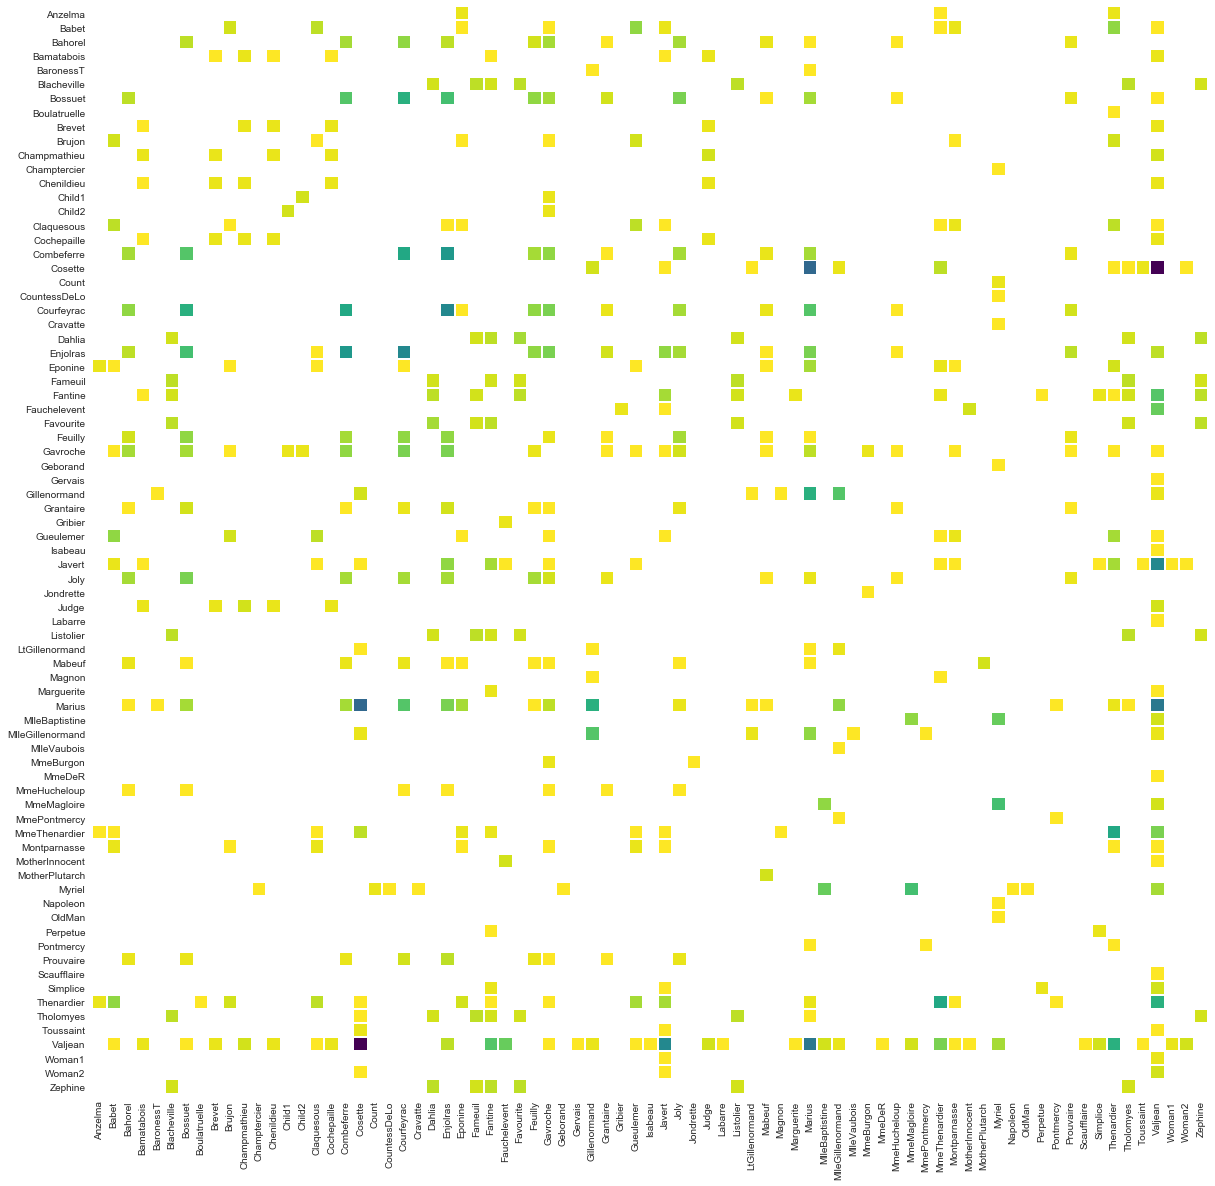

In [256]:
sm = matrix.sort_index(0) #sort rows
sm = sm.sort_index(1) #sort cols
sns.heatmap(sm,cbar=False,cmap='viridis_r',linewidths=1)